In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json

file_list = glob.glob('../client/static/configs/*.json')

df_list = []
for file in file_list:
    with open(file, 'r') as f:
        data = json.load(f)
        df_list.append(pd.DataFrame([data]))  # crea una riga per ogni file

full_df = pd.concat(df_list, ignore_index=True)
print(full_df)


      Thumb_Up   Thumb_Down        Open_Palm  Closed_Fist      Victory  \
0    Volume Up  Volume Down        Scroll Up  Scroll Down       AltTab   
1    Scroll Up  Scroll Down        PlayPause       AltTab    Volume Up   
2    Volume Up  Volume Down        Scroll Up  Scroll Down       AltTab   
3    Scroll Up  Scroll Down        Volume Up  Volume Down       AltTab   
4    Volume Up  Volume Down        PlayPause    Scroll Up  Scroll Down   
5  Volume Down    Volume Up        PlayPause   Screenshot  Scroll Down   
6    Volume Up  Volume Down     Task Manager       AltTab    Scroll Up   
7    Scroll Up  Scroll Down        Volume Up  Volume Down       AltTab   
8    Scroll Up  Scroll Down        Volume Up  Volume Down       AltTab   
9    Scroll Up  Scroll Down  Open Calculator   Screenshot    Volume Up   

          ILoveYou      Pointing_Up  
0        PlayPause           AltTab  
1  Open Calculator      Volume Down  
2        PlayPause  Open Calculator  
3        PlayPause       Screensh

        Gesture          Command  Count
0   Closed_Fist           AltTab      2
1   Closed_Fist       Screenshot      2
2   Closed_Fist      Scroll Down      2
3   Closed_Fist        Scroll Up      1
4   Closed_Fist      Volume Down      3
5      ILoveYou  Open Calculator      1
6      ILoveYou        PlayPause      4
7      ILoveYou      Scroll Down      1
8      ILoveYou        Scroll Up      1
9      ILoveYou     Task Manager      2
10     ILoveYou      Volume Down      1
11    Open_Palm  Open Calculator      1
12    Open_Palm        PlayPause      3
13    Open_Palm        Scroll Up      2
14    Open_Palm     Task Manager      1
15    Open_Palm        Volume Up      3
16  Pointing_Up           AltTab      3
17  Pointing_Up  Open Calculator      3
18  Pointing_Up        PlayPause      1
19  Pointing_Up       Screenshot      2
20  Pointing_Up      Volume Down      1
21   Thumb_Down      Scroll Down      5
22   Thumb_Down      Volume Down      4
23   Thumb_Down        Volume Up      1


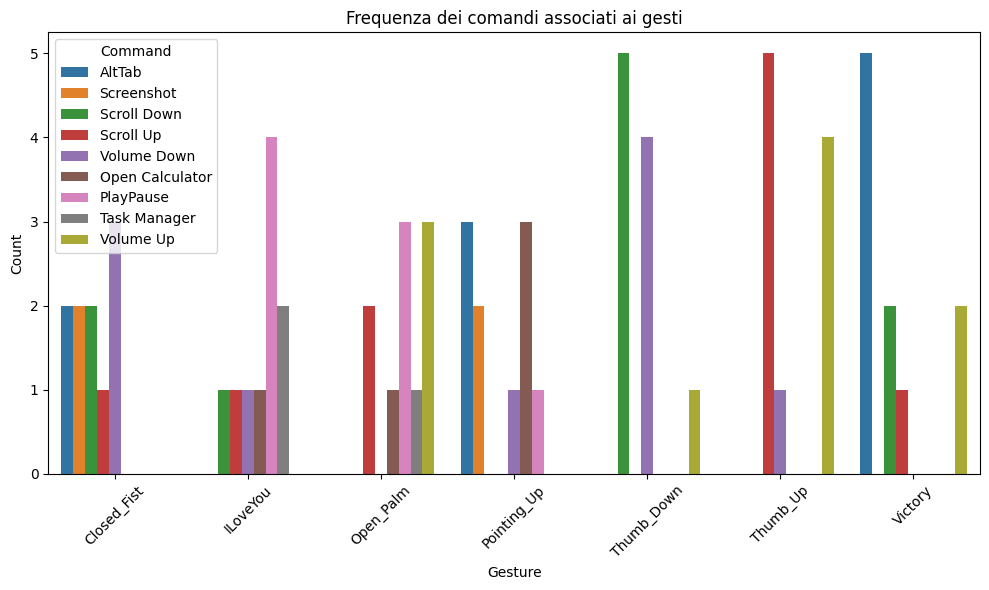

In [10]:
# 2. Converti il DataFrame in formato long (gesture, command)
long_df = full_df.melt(var_name='Gesture', value_name='Command')

# 3. Conta quante volte ogni comando è stato assegnato a ciascun gesto
counts_df = long_df.groupby(['Gesture', 'Command']).size().reset_index(name='Count')

# 4. Stampa il DataFrame risultante
print(counts_df)

# 5. Grafico a barre (uno per gesto)
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=counts_df, x='Gesture', y='Count', hue='Command')
plt.title("Frequenza dei comandi associati ai gesti")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


           Command  Count
0        Volume Up     10
1        Scroll Up     10
2      Volume Down     10
3      Scroll Down     10
4           AltTab     10
5        PlayPause      8
6  Open Calculator      5
7       Screenshot      4
8     Task Manager      3


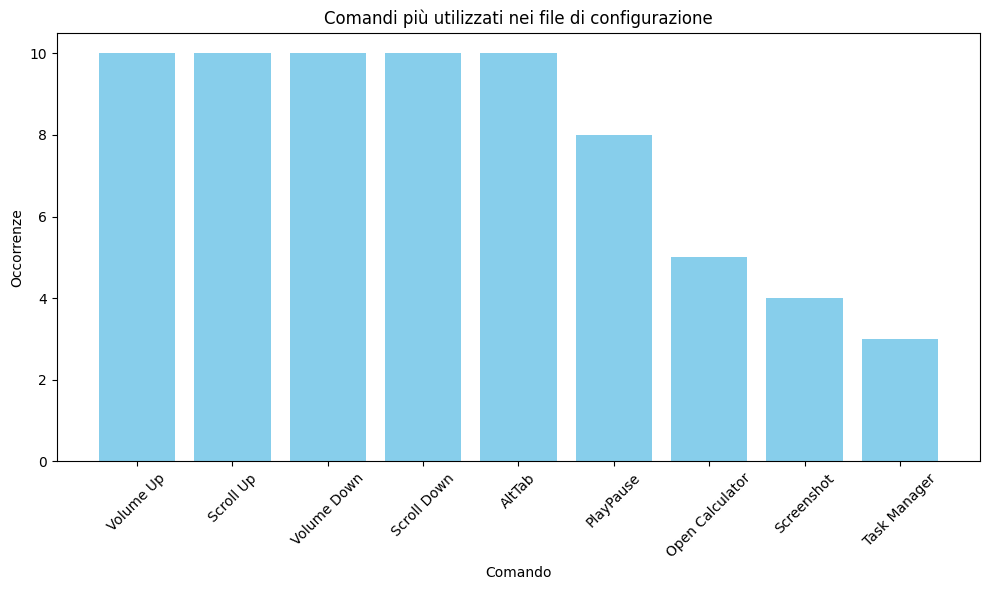

In [11]:
command_counts = long_df['Command'].value_counts().reset_index()
command_counts.columns = ['Command', 'Count']

# 4. Stampa il DataFrame risultante
print(command_counts)

# 5. Grafico a barre ordinato
plt.figure(figsize=(10, 6))
plt.bar(command_counts['Command'], command_counts['Count'], color='skyblue')
plt.title('Comandi più utilizzati nei file di configurazione')
plt.xlabel('Comando')
plt.ylabel('Occorrenze')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()